In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv('heart failur classification dataset.csv')
# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['serum_sodium']])
data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])
data['time'] = impute.transform(data[['time']])

#String to Integer

data['sex'] = (data['sex'] == "Female").astype(int)
data['smoking'] = (data['smoking'] == "Yes").astype(int)

X = data.iloc[:,1:13] #data.iloc[:, 0:2] # first two columns of data frame with all rows. Source : git
y = data.iloc[:,13] #If you are a beginner with Python, remember that df.iloc[:, 10] would refer to the eleventh column.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
prePcaSvmTrainScore = round(svm.score(x_train, y_train)*100,2)
prePcaSvmTestScore = round(svm.score(x_test, y_test)*100,2)
print("Training accuracy of SVM is " + str(prePcaSvmTrainScore))
print("Testing accuracy of SVM is "+ str(prePcaSvmTestScore))

Training accuracy of SVM is 80.75
Testing accuracy of SVM is 85.0


In [14]:
data = pd.read_csv('heart failur classification dataset.csv')
# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['serum_sodium']])
data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])
data['time'] = impute.transform(data[['time']])

#String to Integer

data['sex'] = (data['sex'] == "Female").astype(int)
data['smoking'] = (data['smoking'] == "Yes").astype(int)

X = data.iloc[:,1:13] #data.iloc[:, 0:2] # first two columns of data frame with all rows. Source : git
y = data.iloc[:,13] #If you are a beginner with Python, remember that df.iloc[:, 10] would refer to the eleventh column.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
prePcaRfcTrainScore = round(rfc.score(x_train, y_train)*100,2)
prePcaRfcTestScore = round(rfc.score(x_test, y_test)*100,2)
print("Training accuracy of Random Forest is " + str(prePcaRfcTrainScore))
print("Testing accuracy of Random Forest is "+ str(prePcaRfcTestScore))

Training accuracy of Random Forest is 100.0
Testing accuracy of Random Forest is 93.33


In [50]:
data = pd.read_csv('heart failur classification dataset.csv')
# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['serum_sodium']])
data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])
data['time'] = impute.transform(data[['time']])

#String to Integer

data['sex'] = (data['sex'] == "Female").astype(int)
data['smoking'] = (data['smoking'] == "Yes").astype(int)

X = data.iloc[:,1:13] #data.iloc[:, 0:2] # first two columns of data frame with all rows. Source : git
y = data.iloc[:,13] #If you are a beginner with Python, remember that df.iloc[:, 10] would refer to the eleventh column.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=1000000)
nnc.fit(x_train, y_train)
prePcaNncTrainScore = round(nnc.score(x_train, y_train)*100,2)
prePcaNncTestScore = round(nnc.score(x_test, y_test)*100,2)
print("Training accuracy of NNC is " + str(prePcaNncTrainScore))
print("Testing accuracy of NNC is "+ str(prePcaNncTestScore))

Training accuracy of NNC is 69.04
Testing accuracy of NNC is 71.67


In [57]:
data = pd.read_csv('heart failur classification dataset.csv')
data = data.drop('Unnamed: 0',axis=1)
# handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['serum_sodium']])
data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])
data['time'] = impute.transform(data[['time']])

#String to Integer
pd.options.mode.chained_assignment = None  # default='warn'
data['sex'] = (data['sex'] == "Female").astype(int)
data['smoking'] = (data['smoking'] == "Yes").astype(int)
# data.target[data.target == 'no'] = 0 
# data.target[data.target == 'yes'] = 1 

# X = data.iloc[:,1:13] #data.iloc[:, 0:2] # first two columns of data frame with all rows. Source : git
# y = data.iloc[:,13] #If you are a beginner with Python, remember that df.iloc[:, 10] would refer to the eleventh column.
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

scaler= StandardScaler()
scaledData = scaler.fit_transform(data)

n = int (data.shape[1]/2)

pca = PCA(n_components=n)
principal_components= pca.fit_transform(scaledData)

principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6"])
main_df=pd.concat([principal_df, data[["DEATH_EVENT"]]], axis=1)
main_df.head()


,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,DEATH_EVENT
0,2.741284,0.308877,-0.036939,1.170216,-0.001897,-0.868146,1
1,1.047687,2.002183,2.650509,4.461132,4.408023,-0.806975,1
2,2.573130,2.157898,0.815297,-0.675540,-0.507443,-0.427182,1
3,2.029851,0.298239,0.336369,-0.822522,0.276008,-1.585671,1
4,3.437308,-1.583098,3.288859,-1.864557,-1.394623,1.099453,1


In [58]:
X= main_df.drop("DEATH_EVENT" , axis=1)
y= main_df["DEATH_EVENT"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
postPcaSvmTrainScore = round(svm.score(x_train, y_train)*100,2)
postPcaSvmTestScore = round(svm.score(x_test, y_test)*100,2)
print("Training accuracy of SVM post PCA is " + str(postPcaSvmTrainScore))
print("Testing accuracy of SVM post PCA is "+ str(postPcaSvmTestScore))

Training accuracy of SVM post PCA is 96.65
Testing accuracy of SVM post PCA is 95.0


In [59]:
X= main_df.drop("DEATH_EVENT" , axis=1)
y= main_df["DEATH_EVENT"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
postPcaRfcTrainScore = round(rfc.score(x_train, y_train)*100,2)
postPcaRfcTestScore = round(rfc.score(x_test, y_test)*100,2)
print("Training accuracy of Random Forest post PCA is " + str(postPcaRfcTrainScore))
print("Testing accuracy of Random Forest post PCA is "+ str(postPcaRfcTestScore))

Training accuracy of Random Forest post PCA is 100.0
Testing accuracy of Random Forest post PCA is 91.67


In [60]:
X= main_df.drop("DEATH_EVENT" , axis=1)
y= main_df["DEATH_EVENT"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
postPcaNncTrainScore = round(nnc.score(x_train, y_train)*100,2)
postPcaNncTestScore = round(nnc.score(x_test, y_test)*100,2)
print("Training accuracy of NNC post PCA is " + str(postPcaNncTrainScore))
print("Testing accuracy of NNC post PCA is "+ str(postPcaNncTestScore))

Training accuracy of NNC post PCA is 98.74
Testing accuracy of NNC post PCA is 98.33


Text(0.5, 1.0, 'Test Score')

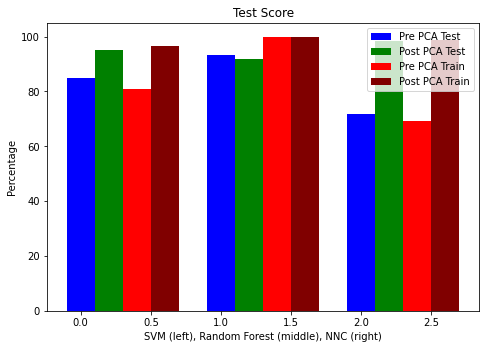

In [61]:
data = [[prePcaSvmTestScore, prePcaRfcTestScore, prePcaNncTestScore],
[postPcaSvmTestScore, postPcaRfcTestScore, postPcaNncTestScore],
[prePcaSvmTrainScore, prePcaRfcTrainScore, prePcaNncTrainScore],
[postPcaSvmTrainScore, postPcaRfcTrainScore, postPcaNncTrainScore]]
X = np.arange(3)

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'blue', width = 0.20)
ax.bar(X + 0.20, data[1], color = 'green', width = 0.20)
ax.bar(X + 0.40, data[2], color = 'red', width = 0.20)
ax.bar(X + 0.60, data[3], color = 'maroon', width = 0.20)

ax.legend(labels=['Pre PCA Test', 'Post PCA Test','Pre PCA Train','Post PCA Train'])

plt.ylabel('Percentage')
plt.xlabel('SVM (left), Random Forest (middle), NNC (right)')
plt.title('Test Score')